In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.shape

(500, 9)

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
X= df.iloc[:,0:7]
print(X.head(2))

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1


In [10]:
y= df.iloc[:,-1]
print(y.head(2))

0    0.92
1    0.76
Name: Chance of Admit , dtype: float64


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 7)
(400,)
(100, 7)
(100,)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled[0:10]

array([[0.42      , 0.25      , 0.        , 0.375     , 0.5       ,
        0.5224359 , 1.        ],
       [0.52      , 0.67857143, 0.75      , 0.75      , 1.        ,
        0.55769231, 0.        ],
       [0.24      , 0.25      , 0.25      , 0.        , 0.25      ,
        0.375     , 0.        ],
       [0.6       , 0.71428571, 0.75      , 0.5       , 0.875     ,
        0.66025641, 1.        ],
       [0.7       , 0.78571429, 0.5       , 0.625     , 0.5       ,
        0.71794872, 1.        ],
       [0.44      , 0.53571429, 0.5       , 0.5       , 0.5       ,
        0.53205128, 1.        ],
       [0.58      , 0.39285714, 0.75      , 0.875     , 0.625     ,
        0.59615385, 0.        ],
       [0.86      , 0.92857143, 1.        , 1.        , 1.        ,
        0.81730769, 1.        ],
       [0.28      , 0.28571429, 0.25      , 0.625     , 0.5       ,
        0.45512821, 0.        ],
       [0.74      , 0.82142857, 0.75      , 0.625     , 0.75      ,
        0.75      , 0. 

In [15]:
X_test_scaled[0:10]

array([[0.46      , 0.35714286, 0.5       , 0.25      , 0.5       ,
        0.47115385, 0.        ],
       [0.42      , 0.25      , 0.25      , 0.375     , 0.5       ,
        0.37820513, 0.        ],
       [0.22      , 0.35714286, 0.5       , 0.375     , 0.25      ,
        0.42628205, 1.        ],
       [0.9       , 0.82142857, 0.75      , 0.875     , 0.875     ,
        0.92307692, 1.        ],
       [0.46      , 0.53571429, 0.25      , 0.375     , 0.25      ,
        0.54487179, 1.        ],
       [0.22      , 0.21428571, 0.        , 0.25      , 0.5       ,
        0.39423077, 1.        ],
       [0.64      , 0.60714286, 1.        , 0.875     , 0.625     ,
        0.64102564, 0.        ],
       [0.        , 0.28571429, 0.        , 0.125     , 0.25      ,
        0.24358974, 0.        ],
       [0.4       , 0.42857143, 0.5       , 0.25      , 0.625     ,
        0.50320513, 0.        ],
       [0.5       , 0.46428571, 0.25      , 0.25      , 0.375     ,
        0.2724359 , 0. 

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-04-02 18:21:39.914784: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 18:21:39.914960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 18:21:40.093673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
model = Sequential()

In [18]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.1314 - val_accuracy: 0.0000e+00 - val_loss: 0.1229
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0900 - val_accuracy: 0.0000e+00 - val_loss: 0.0883
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0702 - val_accuracy: 0.0000e+00 - val_loss: 0.0717
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0670 - val_accuracy: 0.0000e+00 - val_loss: 0.0605
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0584 - val_accuracy: 0.0000e+00 - val_loss: 0.0521
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0496 - val_accuracy: 0.0000e+00 - val_loss: 0.0452
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0414 - val_accuracy: 0.0000e+00 - val_loss: 0.0391
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [21]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [22]:
y_pred[0:10]

array([[0.52002734],
       [0.37193817],
       [0.77472824],
       [1.0309767 ],
       [0.747005  ],
       [0.49258584],
       [0.74785036],
       [0.27571526],
       [0.5130003 ],
       [0.38288474]], dtype=float32)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.04551051303908582

## Trying to improve model performance in below code

In [24]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 1.4494 - val_accuracy: 0.0000e+00 - val_loss: 1.1912
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1.1116 - val_accuracy: 0.0000e+00 - val_loss: 0.9534
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.8983 - val_accuracy: 0.0000e+00 - val_loss: 0.7500
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.6869 - val_accuracy: 0.0000e+00 - val_loss: 0.5935
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.5558 - val_accuracy: 0.0000e+00 - val_loss: 0.4798
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.4333 - val_accuracy: 0.0000e+00 - val_loss: 0.3905
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.3649 - val_accuracy: 0.0000e+00 - val_loss: 0.3159
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - a

In [27]:
y_pred=model.predict(X_test_scaled)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0.7399226901492046


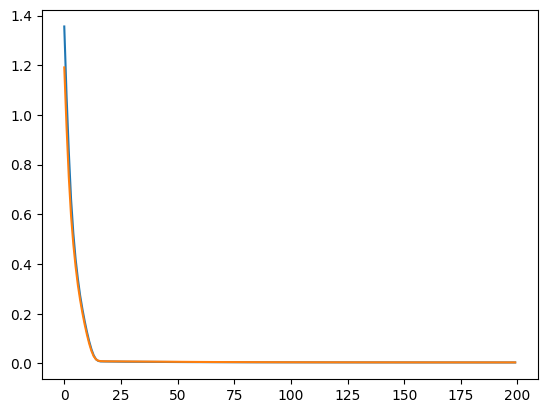

In [30]:
## history.history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])